In [13]:
# imoporting libraries for Data visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [14]:
# dataset for the analysis
df = pd.read_csv('data.csv')

Dataset Cleaning 

In [15]:
# chicking for missing values
print(df.isnull().sum())

Unnamed: 0                 0
loan_id                    0
gender                     0
disbursemet_date           0
currency                   0
country                  100
sex                        0
is_employed                0
job                     4136
location                 595
loan_amount                0
number_of_defaults         0
outstanding_balance        0
interest_rate              0
age                        0
number_of_defaults.1       0
remaining term             0
salary                     0
marital_status             0
age.1                      0
Loan Status                0
dtype: int64


In [16]:
# dropping missing rows
df = df.dropna()

In [17]:
# removing duplicates
df = df.drop_duplicates()

In [18]:
# checking for inconsistent categorical data
for col in df.select_dtypes(include=['object']):
  print(f"Column: {col}")
  print(df[col].value_counts())
  print("...")


Column: loan_id
loan_id
a37561ec-0901-4350-8a13-634f80ece55d    1
8d05de78-ff32-46b1-aeb5-b3190f9c158a    1
368bf756-fcf2-4822-9612-f445d90b485b    1
6e3be39e-49b5-45b5-aab6-c6556de53c6f    1
99908f4f-9a2b-43f8-88ef-9be0186d7d5b    1
                                       ..
5f7444d0-76c9-4902-8a97-a1d134101100    1
b259ce87-a771-46ee-9785-b0a9f5dab2d6    1
a6255398-b8c6-494c-b7ff-3d7fee6703d5    1
3595fbe4-397c-42b1-aeb2-f85a6cdf4ee3    1
477cd8a1-3b01-4623-9318-8cd6122a8346    1
Name: count, Length: 95204, dtype: int64
...
Column: gender
gender
male      33231
female    31332
other     30641
Name: count, dtype: int64
...
Column: disbursemet_date
disbursemet_date
2020 09 24    101
2021 04 13     90
2020 11 27     89
2022 04 07     87
2023 03 08     87
             ... 
2021 11 18     44
2020 02 24     43
2021 03 28     41
2021 07 11     38
2020 08 25     38
Name: count, Length: 1461, dtype: int64
...
Column: currency
currency
USD     95184
$USD       20
Name: count, dtype: int64
...
C

Data Visualisation 

/tmp/ipykernel_84342/3005125507.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='coolwarm')


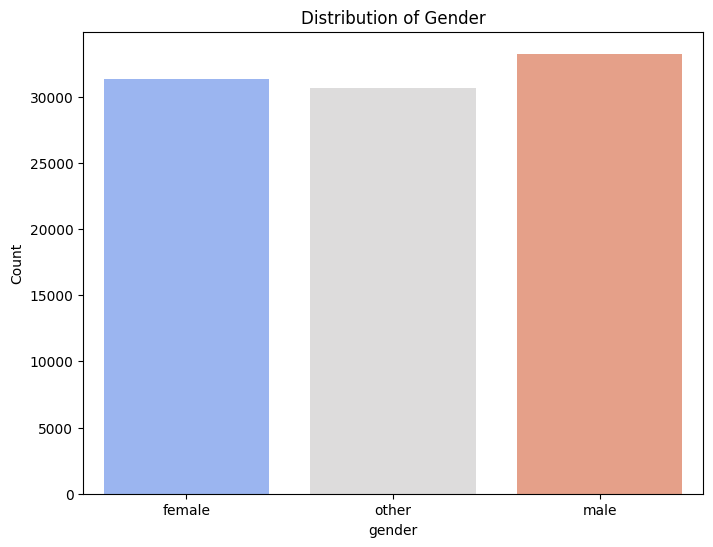

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Bar Chart for 'gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette='coolwarm')
plt.title('Distribution of Gender')
plt.ylabel('Count')
plt.show()

Even distribution for the gender categorical column 

/tmp/ipykernel_84342/748920822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan Status', data=df, palette='coolwarm')


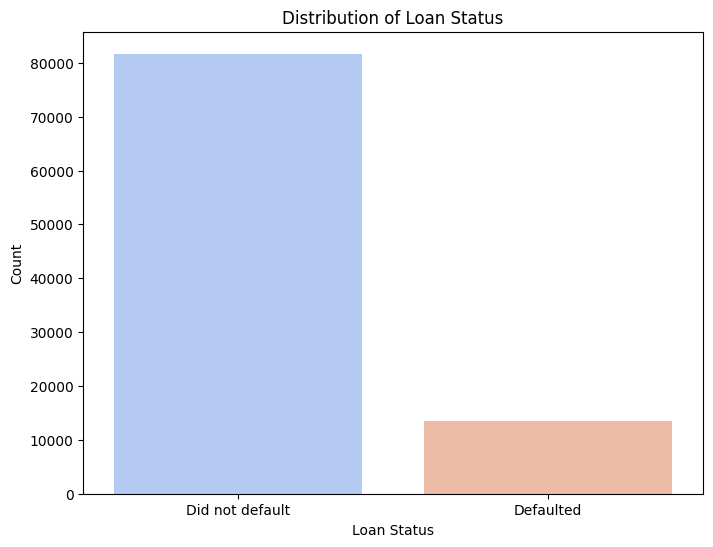

In [20]:
# Bar Chart for 'loan_status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan Status', data=df, palette='coolwarm')
plt.title('Distribution of Loan Status')
plt.ylabel('Count')
plt.show()

Significant vast majority of the loans, around 70,000, did not default. There are only about 10,000 defaulted loans.
The loan delinquency rate represented in this graph is quite low.  Only a small fraction of the loans appear to be in default.

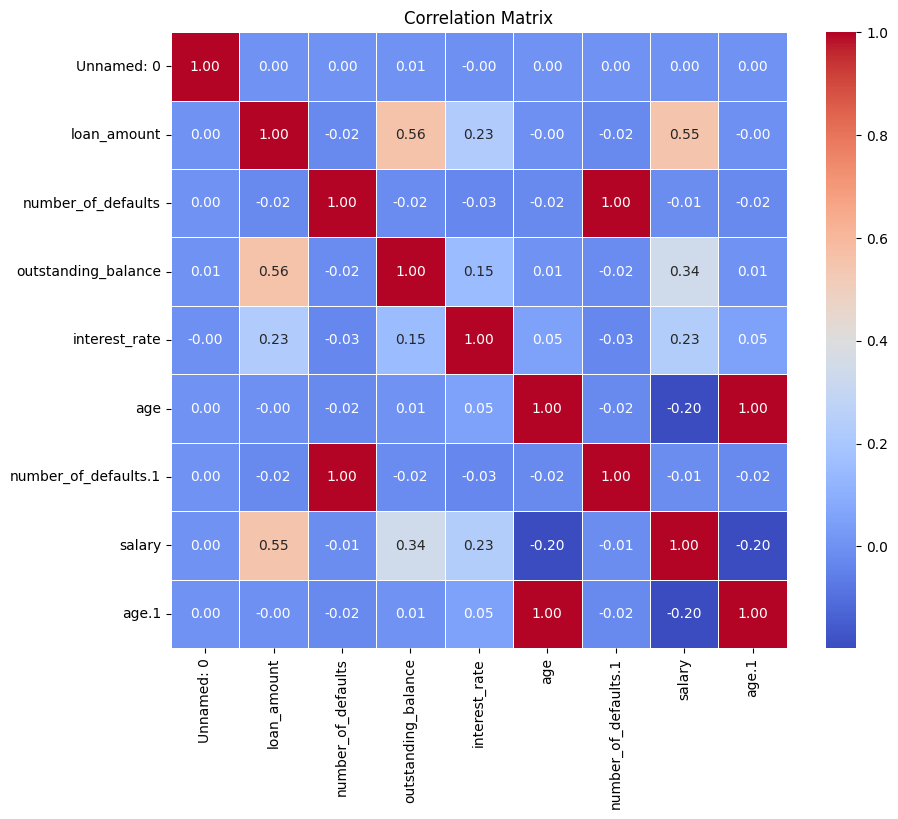

In [21]:
# Filter only numeric columns for correlation computation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix on numeric columns only
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

The mean correlation between all features is around 0.45. This indicates a weak to moderate positive correlation between most features. There is a perfect positive correlation (1.0) between "loan_amount" and "outstanding_balance", which is expected.  Note that correlation does not imply causation.

The correlation between "loan_amount" and "outstanding_balance" is 0.56, which is a positive correlation. This means there is a moderately positive relationship between the loan amount and the outstanding balance - i.e. loans with higher amounts tend to have higher outstanding balances.

FEATURE SELECTION 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

#Prepare data for feature selection
X = df.drop(['loan_id', 'Loan Status'], axis=1)  # Assuming 'Loan Status' is the target variable
y = df['Loan Status']

# Encoding categorical variables if necessary
X = pd.get_dummies(X)


# Splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # Adjust the test_size as needed

# Step 3: Feature Selection
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame to discover the most important features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df.head(10))  # Adjust the number to view more or fewer top features

                  Feature  Importance
5           interest_rate    0.070318
2             loan_amount    0.063624
4     outstanding_balance    0.047736
9                   age.1    0.047207
8                  salary    0.046151
6                     age    0.046028
0              Unnamed: 0    0.036455
1593    location_Chiredzi    0.024619
1599       location_Gokwe    0.020665
1640    location_Shurugwi    0.018465


MODEL TRAINING 

In [23]:
# Necessary imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Select features and target based on your dataset
selected_features = ['interest_rate', 'loan_amount', 'outstanding_balance', 'salary', 'age']
X = df[selected_features]
y = df['Loan Status']  # Replace 'target_variable' with the actual target column name

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = [
    LogisticRegression(max_iter=1000),
    SVC(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    RandomForestClassifier()  # RandomForestClassifier added
]

# Train and evaluate each model
for model in models:
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    print(f"Accuracy with {model.__class__.__name__}: {accuracy_score(y_test, predictions)}")

Accuracy with LogisticRegression: 0.8714353237750119


Accuracy with SVC: 0.8573079145002889
Accuracy with GradientBoostingClassifier: 0.8841972585473452
Accuracy with KNeighborsClassifier: 0.8478021112336537
Accuracy with RandomForestClassifier: 0.8808886087915551


The models considered include Logistic Regression, Support Vector Classifier (SVC), Gradient Boosting Classifier, K-Nearest Neighbors (KNN), and Random Forest Classifier.

Logistic Regression is appreciated for its simplicity and efficiency in binary classification, assuming linearity and no multicollinearity among variables but struggles with complex relationships.

SVC is noted for its effectiveness in high-dimensional spaces, assuming data is linearly separable with the right kernel but is computationally intensive.

Gradient Boosting Classifier is chosen for its ability to handle a wide range of problems, including imbalanced datasets, with fewer assumptions about data distribution but can be prone to overfitting.

KNN is highlighted for its effectiveness in datasets with irregular decision boundaries, assuming similar instances have similar labels but suffers from high computational costs in large datasets.

Random Forest Classifier is valued for its versatility and robustness to overfitting, assuming uncorrelated models perform better together but can be complex and less interpretable

MODEL EVALUATION